## Кластеризация (Clustering)

Итак, у нас __имеются векторы__, которые, как нам кажется, __достаточно адекватно отражают содержание сообщений__. __Есть много способов сгруппировать эти векторы__. Большинство алгоритмов кластеризации относятся к одной из двух категорий: плоские и иерархические.
1. __Алгоритмы плоской кластеризации__ разбивают множество сообщений на несколько кластеров, никак не связанных между собой. __Цель проста__ - найти такое разбиение, чтобы все сообщения, попавшие в один кластер, были похожи друг на друга и в то же время отличались от сообщений из других кластеров. Во многих алгоритмах плоской кластеризации требуется задавать число кластеров заранее.
2. В алгоритмах __иерархической кластеризации__ число кластеров задавать не нужно - алгоритм сам строит иерархию кластеров. Похожие сообщения собираются в одном кластере, а затем похожие кластеры объединяются в __суперкластер__. Это делается рекурсивно, пока не останется один кластер, содержащий все сообщения. По завершении процесса можно выбрать нужное число кластеров из построенной иерархии. Однако эффективность такого процесса невысока.

В пакете __sklearn.cluster__ из библиотеки SciKit реализованы различные подходы к кластеризации.

## Метод К средних (K-means)

__Метод К средних__ - самый распространенный алгоритм плоской кластеризации. Получив требуемое число кластеров, __num_clusters__, он создает именно столько так называемых __центроидов кластеров (cluster centroids)__. 
1. Алгоритм произвольно выбирает num_clusters сообщений и в качестве центроидов берет их векторы признаков. 
2. Каждое из оставшихся сообщений соотносится с ближайшим к нему центроидом, и так образуются кластеры. 
3. Вычисляются новые положения центроидов - путем усреднения по всем векторам каждого кластера. Разумеется, при этом изменяется распределение сообщений по кластерам. Некоторые сообщения оказываются ближе к другому кластеру. Поэтому происходит перемещение таких сообщений из одного кластера в другой. Это делается до тех пор, пока положение центроидов не стабилизируется. 
4. После нескольких итераций расстояния между старым и новым положением каждого центроида оказывается меньше порогового значения, и мы считаем, что процесс построения кластеров сошелся.

In [1]:
num_clusters = 3

Рассмотрим простенький пример, когда сообщения состоят всего из двух слов. Каждая точка на следующем рисунке представляет один документ.

In [2]:
import scipy as sp
from matplotlib import pylab

seed = 2
sp.random.seed(seed)  # для постоянства случайных данных

def plot_clustering(x, y, title, mx=None, ymax=None, xmin=None, km=None):
    pylab.figure(num=None, figsize=(8, 6))
    if km:
        pylab.scatter(x, y, s=50, c=km.predict(list(zip(x, y))))
    else:
        pylab.scatter(x, y, s=50)

    pylab.title(title)
    pylab.xlabel("Occurrence word 1")
    pylab.ylabel("Occurrence word 2")

    pylab.autoscale(tight=True)
    pylab.ylim(ymin=0, ymax=1)
    pylab.xlim(xmin=0, xmax=1)
    pylab.grid(True, linestyle='-', color='0.75')

    return pylab

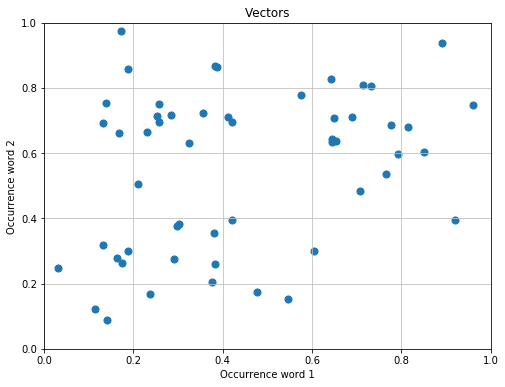

In [3]:
from scipy.stats import norm

xw1 = norm(loc=0.3, scale=.15).rvs(20)
yw1 = norm(loc=0.3, scale=.15).rvs(20)

xw2 = norm(loc=0.7, scale=.15).rvs(20)
yw2 = norm(loc=0.7, scale=.15).rvs(20)

xw3 = norm(loc=0.2, scale=.15).rvs(20)
yw3 = norm(loc=0.8, scale=.15).rvs(20)

x = sp.append(sp.append(xw1, xw2), xw3)
y = sp.append(sp.append(yw1, yw2), yw3)

i = 1
plot_clustering(x, y, "Vectors")
pylab.show()

__После одной итерации метода К средних__, то есть выбора двух произвольных векторов в качестве начальных точек, распределения остальных по кластерам и изменения положения центроидов кластеров (cluster centers) получается такая картина:

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3.7464563797


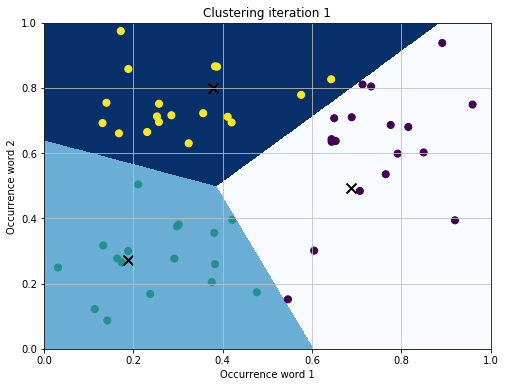

In [4]:
from sklearn.cluster import KMeans
i += 1

# Одна итерация ####################

mx, my = sp.meshgrid(sp.arange(0, 1, 0.001), sp.arange(0, 1, 0.001))

km = KMeans(init='random', n_clusters=num_clusters, verbose=1,
            n_init=1, max_iter=1,
            random_state=seed)
km.fit(sp.array(list(zip(x, y))))

Z = km.predict(sp.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)

plot_clustering(x, y, "Clustering iteration 1", km=km)
pylab.imshow(Z, interpolation='nearest',
             extent=(mx.min(), mx.max(), my.min(), my.max()),
             cmap=pylab.cm.Blues,
             aspect='auto', origin='lower')

c1a, c1b, c1c = km.cluster_centers_
pylab.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')
pylab.show()

Поскольку центроиды кластеров сместились, мы должны переместить некоторые точки в другие кластеры и пересчитать положения центроидов (cluster centers). После второй итерации получаются такие кластеры:

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3.7464563797
start iteration
done sorting
end inner loop
Iteration 1, inertia 2.83547634192


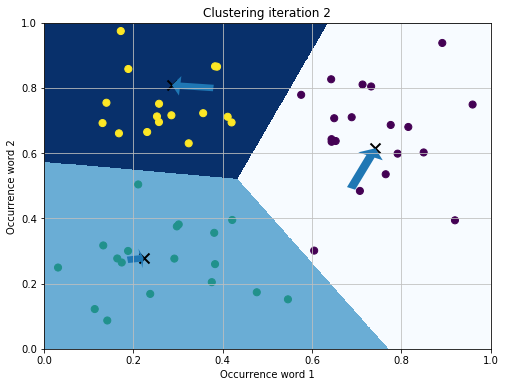

In [5]:
i += 1

# 2 Итерации ####################
km = KMeans(init='random', n_clusters=num_clusters, verbose=1,
            n_init=1, max_iter=2,
            random_state=seed)
km.fit(sp.array(list(zip(x, y))))

Z = km.predict(sp.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)

plot_clustering(x, y, "Clustering iteration 2", km=km)
pylab.imshow(Z, interpolation='nearest',
             extent=(mx.min(), mx.max(), my.min(), my.max()),
             cmap=pylab.cm.Blues,
             aspect='auto', origin='lower')

c2a, c2b, c2c = km.cluster_centers_
pylab.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')

pylab.gca().add_patch(
    pylab.Arrow(c1a[0], c1a[1], c2a[0] - c1a[0], c2a[1] - c1a[1], width=0.1))
pylab.gca().add_patch(
    pylab.Arrow(c1b[0], c1b[1], c2b[0] - c1b[0], c2b[1] - c1b[1], width=0.1))
pylab.gca().add_patch(
    pylab.Arrow(c1c[0], c1c[1], c2c[0] - c1c[0], c2c[1] - c1c[1], width=0.1))

pylab.show()

__Стрелками показано перемещение центроидов__. После пяти итераций центроиды практически перестают смещаться (в SciKit пороговое отклонение по умолчанию равно 0.0001).

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3.7464563797
start iteration
done sorting
end inner loop
Iteration 1, inertia 2.83547634192
start iteration
done sorting
end inner loop
Iteration 2, inertia 2.53604625612
start iteration
done sorting
end inner loop
Iteration 3, inertia 2.44722301621
start iteration
done sorting
end inner loop
Iteration 4, inertia 2.44722301621
center shift 0.000000e+00 within tolerance 7.366762e-06


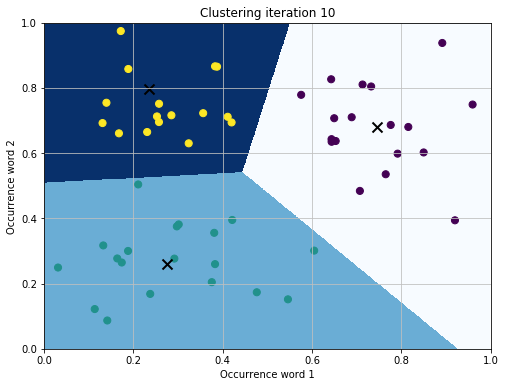

In [6]:
i += 1

# 3 итерации ####################
km = KMeans(init='random', n_clusters=num_clusters, verbose=1,
            n_init=1, max_iter=10,
            random_state=seed)
km.fit(sp.array(list(zip(x, y))))

Z = km.predict(sp.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)

plot_clustering(x, y, "Clustering iteration 10", km=km)
pylab.imshow(Z, interpolation='nearest',
             extent=(mx.min(), mx.max(), my.min(), my.max()),
             cmap=pylab.cm.Blues,
             aspect='auto', origin='lower')

pylab.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')
pylab.show()

После стабилизации кластеров нам остается только запомнить положения центроидов и то, к каким кластерам они относятся. Когда поступает новый документ, мы векторизуем его, вычисляем расстояние до каждого центроида и относим документ к тому кластеру, центроид которого окажется ближе всего.

## Тестовые данные для проверки наших идей

__Нам нужны уже сгруппированные документы на технические темы__, чтобы мы могли проверить, будет ли алгоритм работать, как мы предполагаем, когда ему предъявят новые документы.

Одним из стандартных для машинного обучения является набор данных __20newsgroup__, содержащий 18 826 сообщений из 20 новостных групп по разным тематикам - как техническим, например __comp.sys.mac.hardware__ или __sci.crypt__, так и относящимся к политике и религии , например __talk.politics.guns__ или __soc.religion__. Мы ограничимся только техническими группами. Если считать каждую новостную группу кластером, то нам будет очень легко проверить, какой подход
к поиску взаимосвязанных сообщений окажется наилучшим.

In [7]:
groups = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
    'comp.sys.mac.hardware', 'comp.windows.x', 'sci.space']

В библиотеке SciКit уже есть специальный загрузчик для этого набора с очень удобными параметрами.

Этот набор поставляется в формате ZIР-файла __ctataset-379 -20news-18828_WJQIG.zip__, который мы распакуем в каталог 379. Нужно будет еще сообщить SciКit путь к каталогу данных. __Там находится файл метаданных и три подкаталога__: test, train и raw. 
* В каталоге __train__ находится 60% данных, предназначенных для обучения, 
* В каталоге __test__ - 40 %, предназначенных для тестирования. 

Путь к каталогу указывается либо в переменной окружения __MLCOMP_DАТАSЕTS_HOMЕ__, либо непосредственно в параметре __mlcomp_root__ команды загрузки набора.

Для удобства модуль __sklearn.datasets__ включает функцию __fetch_20newsgroups__, которая автоматически скачивает данные:

In [8]:
import sklearn.datasets
all_data = sklearn.datasets.fetch_20newsgroups(subset='all')
print(len(all_data.filenames))

18846


In [9]:
print(all_data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


Мы можем выбрать обучающий или тестовый набор:

In [10]:
train_data = sklearn.datasets.fetch_20newsgroups(subset='train')
print(len(train_data.filenames))

11314


In [11]:
test_data = sklearn.datasets.fetch_20newsgroups(subset='test')
print(len(test_data.filenames))

7532


Для простоты возьмем не все группы, чтобы цикл эксперимента был короче. Для этого служит параметр __categories__:

In [12]:
train_data = sklearn.datasets.fetch_20newsgroups(subset='train', categories=groups)
print(len(train_data.filenames))

3529


In [13]:
test_data = sklearn.datasets.fetch_20newsgroups(subset='test', categories=groups)
print(len(test_data.filenames))

2349


## Кластеризация сообщений

Вы, наверное, уже обратили внимание, что реальные данные обычно зашумлены. И набор данных из новостных групп - не исключение. Он даже содержит недопустимые символы, приводящие к ошибке __UnicodeDecodeError__.

Мы должны сказать векторизатору, что такие ошибки следует игнорировать:

In [14]:
import nltk.stem
from sklearn.feature_extraction.text import TfidfVectorizer

english_stemmer = nltk.stem.SnowballStemmer('english')

class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

vectorizer = StemmedTfidfVectorizer(min_df=10, max_df=0.5,
                                    stop_words='english', decode_error='ignore')

vectorized = vectorizer.fit_transform(train_data.data)
num_samples, num_features = vectorized.shape
print("#samples: %d, #features: %d" % (num_samples, num_features))

#samples: 3529, #features: 4712


Теперь у нас есть пул из __3529 сообщений и построенный__ по ним __4172-мерный вектор признаков__. Это и будет подано на вход алгоритма К средних.

Будем использовать 50 кластеров:

In [15]:
num_clusters = 50
from sklearn.cluster import KMeans
km = KMeans(n_clusters=num_clusters, init='random', n_init=1, verbose=1, random_state=3)
km.fit(vectorized)

Initialization complete
Iteration  0, inertia 5899.560
Iteration  1, inertia 3218.298
Iteration  2, inertia 3184.333
Iteration  3, inertia 3164.867
Iteration  4, inertia 3152.004
Iteration  5, inertia 3143.111
Iteration  6, inertia 3136.256
Iteration  7, inertia 3129.325
Iteration  8, inertia 3124.567
Iteration  9, inertia 3121.900
Iteration 10, inertia 3120.210
Iteration 11, inertia 3118.627
Iteration 12, inertia 3117.363
Iteration 13, inertia 3116.811
Iteration 14, inertia 3116.588
Iteration 15, inertia 3116.417
Iteration 16, inertia 3115.760
Iteration 17, inertia 3115.374
Iteration 18, inertia 3115.155
Iteration 19, inertia 3114.949
Iteration 20, inertia 3114.515
Iteration 21, inertia 3113.937
Iteration 22, inertia 3113.720
Iteration 23, inertia 3113.548
Iteration 24, inertia 3113.475
Iteration 25, inertia 3113.447
Converged at iteration 25: center shift 0.000000e+00 within tolerance 2.069005e-08


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=50, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=3, tol=0.0001, verbose=1)

После обучения модели информацию о кластерах можно получить из полей объекта __km__. Каждому векторизованному
сообщению, участвовавшему в обучении, соответствует целочисленная метка в массиве __km.labels_ __:

In [16]:
print(km.labels_)

[38 17 47 ..., 41 14 16]


In [17]:
print(km.labels_.shape)

(3529L,)


Центроиды кластеров можно получить с помощью __ km.cluster\_centers\_ __

In [18]:
print(km.cluster_centers_)

[[ 0.          0.          0.         ...,  0.          0.          0.05115952]
 [ 0.00255397  0.          0.         ...,  0.          0.          0.        ]
 [ 0.00585929  0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.07535044  0.         ...,  0.          0.          0.        ]]


In [19]:
from sklearn import metrics

labels = train_data.target

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))

print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))

print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))

print("Adjusted Rand Index: %0.3f" %
      metrics.adjusted_rand_score(labels, km.labels_))

print("Adjusted Mutual Information: %0.3f" %
      metrics.adjusted_mutual_info_score(labels, km.labels_))

print(("Silhouette Coefficient: %0.3f" %
       metrics.silhouette_score(vectorized, labels, sample_size=1000)))

Homogeneity: 0.428
Completeness: 0.221
V-measure: 0.291
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.213
Silhouette Coefficient: 0.006


## Решение исходной задачи

А теперь соберем все вместе и продемонстрируем работу системы на примере следующего сообщения, которое мы запишем в переменную __new_post__:

In [20]:
new_post = \
    """Disk drive problems. Hi, I have a problem with my hard disk.
After 1 year it is working only sporadically now.
I tried to format it, but now it doesn't boot any more.
Any ideas? Thanks.
"""

In [21]:
new_post_vec = vectorizer.transform([new_post])
new_post_label = km.predict(new_post_vec)[0]

Теперь, когда у нас имеются кластеры, уже нет необходимости сравнивать __new_post_vec__ с векторами всех сообщений. Можно ограничиться лишь сообщениями в одном с ним кластерами. Давайте выберем индексы этих сообщений в исходном наборе данных:

In [22]:
similar_indices = (km.labels_==new_post_label).nonzero()[0]

Результатом сравнения в круглых скобках является булев массив, а метод __nonzero__ возвращает меньший массив, содержащий индексы элементов, равных True.

С помощью метода __similar_indices__ мы затем строим список сообщений вместе с оценками сходства:

In [23]:
similar = []
for i in similar_indices:
    dist = sp.linalg.norm((new_post_vec - vectorized[i]).toarray())
    similar.append((dist, train_data.data[i]))

similar = sorted(similar)
print("Count similar: %i" % len(similar))

Count similar: 166


В том кластере, куда попало наше сообщение. находится 166 сообщений. Чтобы пользователь мог составить представление о том, какие есть похожие сообщения, мы покажем одно самое похожее (__show_at_1__) и два не так похожих, но все-таки не совсем посторонних - все берутся из одного и того же кластера.

In [24]:
show_at_1 = similar[0]
show_at_2 = similar[int(len(similar) / 10)]
show_at_3 = similar[int(len(similar) / 2)]

print("=== #1 ===")
print(show_at_1)
print()

print("=== #2 ===")
print(show_at_2)
print()

print("=== #3 ===")
print(show_at_3)

=== #1 ===
(1.0378441731334072, u"From: Thomas Dachsel <GERTHD@mvs.sas.com>\nSubject: BOOT PROBLEM with IDE controller\nNntp-Posting-Host: sdcmvs.mvs.sas.com\nOrganization: SAS Institute Inc.\nLines: 25\n\nHi,\nI've got a Multi I/O card (IDE controller + serial/parallel\ninterface) and two floppy drives (5 1/4, 3 1/2) and a\nQuantum ProDrive 80AT connected to it.\nI was able to format the hard disk, but I could not boot from\nit. I can boot from drive A: (which disk drive does not matter)\nbut if I remove the disk from drive A and press the reset switch,\nthe LED of drive A: continues to glow, and the hard disk is\nnot accessed at all.\nI guess this must be a problem of either the Multi I/o card\nor floppy disk drive settings (jumper configuration?)\nDoes someone have any hint what could be the reason for it.\nPlease reply by email to GERTHD@MVS.SAS.COM\nThanks,\nThomas\n+-------------------------------------------------------------------+\n| Thomas Dachsel                             

В следующей таблице показаны эти сообщения и их оценки сходства (similarity values):

<img src = "img/excerpt-from-post.jpg" width=700>

Интересно, как оценка схожести зависит от сообщения. 
* __Первое сообщение__ содержит все характерные слова, встречающиеся в новом сообщении. 
* __Второе__ относится к проблемам загрузки (booting), но с гибких, а не с жестких дисков. 
* __Третье__ вообще не про жесткие диски и не про загрузку. 

И тем не менее, все они без сомнения написаны на ту же тему, что и новое сообщение.

## Другой взгляд на шум

Не следует ожидать, что кластеризация окажется идеальной, то есть что все сообщения из одной новостной группы (например, comp.graphics) попадут в один кластер. Ниже приведен __пример, показывающий, какой бывает шум__. Для простоты ограничимся одним коротким сообщением.

In [25]:
post_group = zip(train_data.data, train_data.target)
# Создать список кортежей, которые могут быть 
# отсортированы по длине сообщения
all = [(len(post[0]), post[0], train_data.target_names[post[1]])
       for post in post_group]
graphics = sorted([post for post in all if post[2] == 'comp.graphics'])
print(graphics[5])

(245, u'From: SITUNAYA@IBM3090.BHAM.AC.UK\nSubject: test....(sorry)\nOrganization: The University of Birmingham, United Kingdom\nLines: 1\nNNTP-Posting-Host: ibm3090.bham.ac.uk\n\n==============================================================================\n', 'comp.graphics')


Здесь нет никаких указаний на принадлежность к группе comp.graphics, если рассматривать только слова, оставшиеся после этапа предварительной обработки:

In [26]:
noise_post = graphics[5][1]

analyzer = vectorizer.build_analyzer()
print(list(analyzer(noise_post)))

[u'situnaya', u'ibm3090', u'bham', u'ac', u'uk', u'subject', u'test', u'sorri', u'organ', u'univers', u'birmingham', u'unit', u'kingdom', u'line', u'nntp', u'post', u'host', u'ibm3090', u'bham', u'ac', u'uk']


И это мы произвели только __разбиение на лексемы__, __приведение к нижнему регистру__ и __удаление стоп-слов__. А если к тому же исключить слова, которые на следующем этапе - при вызове метода __fit_transform__ - будут отфильтрованы за счет параметров __min_df__ и __max_df__, то ситуация станет еще хуже:

In [27]:
useful = set(analyzer(noise_post)).intersection(vectorizer.get_feature_names())
print(sorted(useful))

[u'ac', u'birmingham', u'host', u'kingdom', u'nntp', u'sorri', u'test', u'uk', u'unit', u'univers']


Но и этого мало. Большинство этих слов часто встречаются и в других сообщениях, о чем свидетельствуют оценки IDF. Напомним, что __чем выше показатель TF-IDF, тем лучше данный терм характеризует именно это сообщение__. IDF является мультипликативным фактором: __если его значение мало, значит, ценность терма невелика.__

In [28]:
for term in sorted(useful):
    print('IDF(%s)=%.2f' % (term, vectorizer._tfidf.idf_[vectorizer.vocabulary_[term]]))

IDF(ac)=3.51
IDF(birmingham)=6.77
IDF(host)=1.74
IDF(kingdom)=6.68
IDF(nntp)=1.77
IDF(sorri)=4.14
IDF(test)=3.83
IDF(uk)=3.70
IDF(unit)=4.42
IDF(univers)=1.91


Таким образом, термы с наивысшей различающей способностью, __birmingham__ и __kingdom__, очевидно, не относятся к компьютерной графике, как и термы с низкими оценками IDF. Поэтому понятно, почему сообщения из разных новостных групп могут попасть в один кластер.

Нам, впрочем, это не так уж важно, потому что __наша цель - сократить количество сообщений, с которыми нужно сравнивать новое.__ А то, из какой новостной группы взяты обучающие данные, большого интереса не представляет.

## Настройка (Tweaking) параметров

* Можно подобрать количество кластеров или попробовать, разные значения параметра __max_features__ векторизатора. 
* Можно поиграть с разными начальными положениями центроидов. 
* Можно использовать для кластеризации другие меры сходства: __коэффициент Отиаи (Cosine similarity)__, __коэффициент корреляции Пирсона (Pearson)__, __меру Жаккара (Jaccard)__. 

Но нужно решить, что значит "лучше". В SciKit есть целый пакет __sklearn.metrics__ и содержит полный спектр
метрик для измерения качества кластеризации. Стоит заглянуть туда - прямо в исходный код этого пакета.

## Резюме

Это было непростое путешествие:
* начавшееся с __предварительной обработки (pre-processing)__, 
* продолжившееся обсуждением __кластеризации (clustering)__ и 
* завершившееся решением, которое позволяет преобразовать зашумленный текст в компактное __векторное представление (meaningful concise vector representation)__, допускающее кластеризацию.

Собствено на кластеризацию было потрачено больше половины усилий. Но попутно мы кое-что узнали об обработке текстов (text processing) и о том, как далеко может завести простой подсчет (counting) в мире реальных данных.